In [42]:
# import necessary libraries

# data manipulation libraries
import pandas as pd
import numpy as np 

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# stratified splitting libraries
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# preprocessing libraries
from sklearn.preprocessing import StandardScaler

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Load data

from the UCI machine learning repository, the statlog (German Credit Data) exists without actual headers in the text file, but the data card is present to help fill out the columns names using pandas

https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data

In [15]:
df = pd.read_csv("statlog_german_credit_data/german.data", header=None, delim_whitespace=True)
headers = [
    "Status of existing checking account",
    "Duration in month",
    "Credit history",
    "Purpose",
    "Credit amount",
    "Savings account/bonds",
    "Present employment since",
    "Installment rate in percentage of disposable income",
    "Personal status and sex",
    "Other debtors / guarantors",
    "Present residence since",
    "Property",
    "Age in years",
    "Other installment plans",
    "Housing",
    "Number of existing credits at this bank",
    "Job",
    "Number of people being liable to provide maintenance for",
    "Telephone",
    "Foreign worker",
    "Risk"
]
df.columns = headers
df.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker,Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       1000 non-null   object
 1   Duration in month                                         1000 non-null   int64 
 2   Credit history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Savings account/bonds                                     1000 non-null   object
 6   Present employment since                                  1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   Personal status and sex      

from the `.info()` we get that:

* there are 1000 instances and 20 features
* the instances most of the features are of integer data type and the rest of object data type
* there are no non-null instances

## Understanding the numerical features

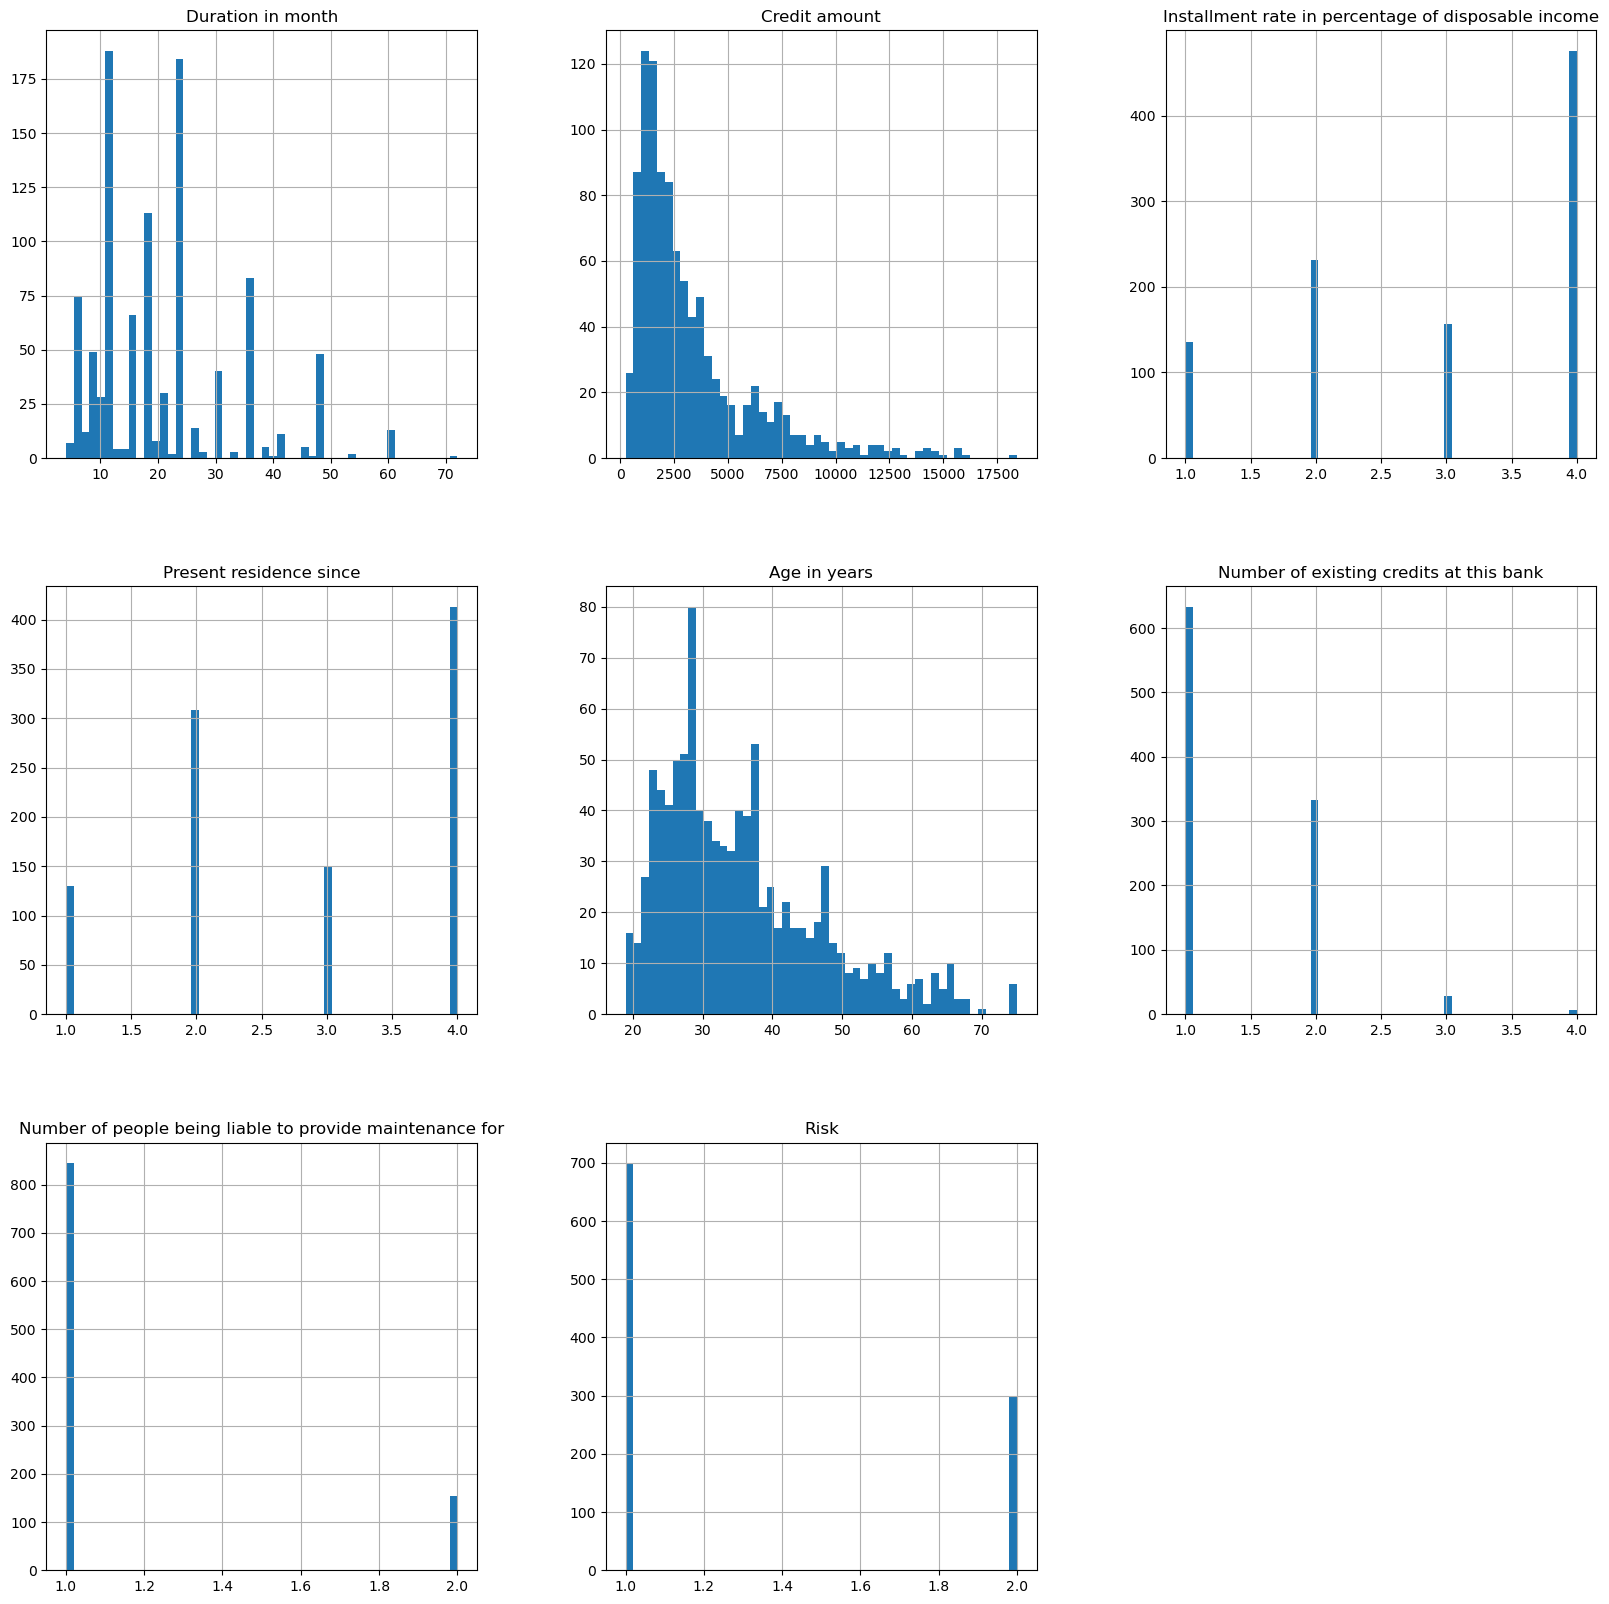

In [20]:
df.hist(figsize=(20, 20), bins=50)
plt.show()

From the histograms of the numerical features:
* `jobs`, `Number of existing credits at this bank`, `Number of people liable to provide maintenance for`, `present residence since`, `percentage of disposable income`, and `risk` are categorical features which will be converted to numerical before feeding it to the model
* The rest of the features are heavily skewed to the left

Before moving forward, the data should be split first

In [21]:
# stratified sampling
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['Risk']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [23]:
strat_train_set.shape

(800, 21)

In [24]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 828 to 749
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       800 non-null    object
 1   Duration in month                                         800 non-null    int64 
 2   Credit history                                            800 non-null    object
 3   Purpose                                                   800 non-null    object
 4   Credit amount                                             800 non-null    int64 
 5   Savings account/bonds                                     800 non-null    object
 6   Present employment since                                  800 non-null    object
 7   Installment rate in percentage of disposable income       800 non-null    int64 
 8   Personal status and sex          

## Exploring the train set

In [25]:
credit_visualization = strat_train_set.copy()

In [30]:
credit_visualization["Risk"].value_counts()

Risk
1    560
2    240
Name: count, dtype: int64

In [32]:
percentage_distribution = credit_visualization["Risk"].value_counts()/len(credit_visualization)
percentage_distribution

Risk
1    0.7
2    0.3
Name: count, dtype: float64

The `RISK` feature is the target feature containing binary values:

- 1 = Good
- 2 = Bad

with no missing values

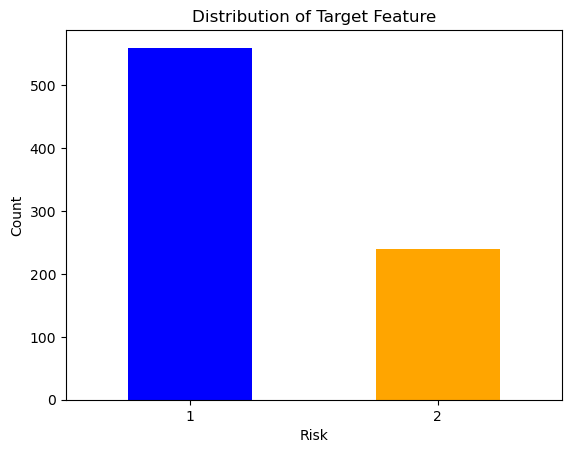

In [29]:
# target feature
credit_visualization["Risk"].value_counts().plot(kind="bar", color=["blue", "orange"])
plt.title("Distribution of Target Feature")
plt.xlabel("Risk")
plt.ylabel("Count") 
plt.xticks(rotation=0)
plt.show()

In the training set, instances that fall in the `Good` class are more than the instances that fall in the `Bad` class, in a ratio 70:30. Our classes are imbalanced, meaning accuracy only won't be chosen to evaluate out risk model

In [33]:
# exploring the first feature
credit_visualization["Status of existing checking account"].value_counts()

Status of existing checking account
A14    316
A11    219
A12    214
A13     51
Name: count, dtype: int64

Because this is a german dataset, the currency will be converted to kenyan shillings. That is 1DM = ksh 0.27

- `A14` : No checking account
- `A11` : less the 0 shillings
- `A12` : less than 54 shillings
- `A13` : greater than 54 shillings

In [62]:
# replace status of checking account with the actual values
credit_visualization["Status of existing checking account"] = credit_visualization["Status of existing checking account"].replace({
                                                                                                "A14": "No checking account",
                                                                                                "A11": "< 0 DM",
                                                                                                "A12": "0 - 200 DM",
                                                                                                "A13": ">= 200 DM"
                                                                                            })

### Comparing status of existing checking account and the risk

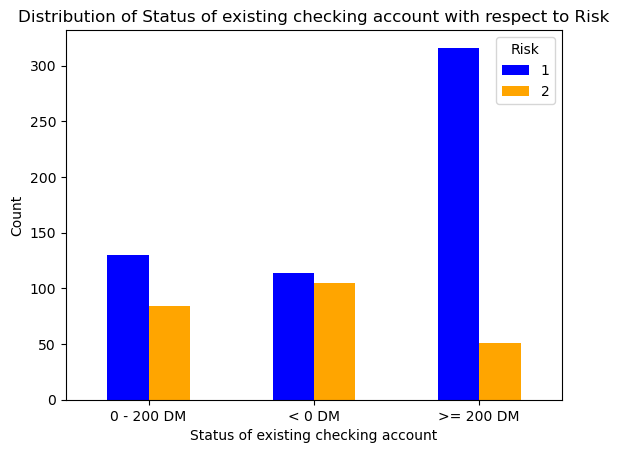

In [63]:
pd.crosstab(credit_visualization["Status of existing checking account"], credit_visualization["Risk"]).plot(kind="bar", color=["blue", "orange"])
plt.title("Distribution of Status of existing checking account with respect to Risk")
plt.xlabel("Status of existing checking account")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

Because of the varied distribution of the savings account classes the individuals with no checking account seem to have less risk compared to the rest of the classes & the individuals with more than 54 shillings are fewer but have less risks

In [38]:
# explore the duration in month feature
credit_visualization["Duration in month"].value_counts()

Duration in month
24    149
12    144
18     88
36     70
6      59
15     54
9      43
48     36
30     32
21     23
10     21
42     10
60     10
27      8
20      7
11      6
8       6
4       5
7       4
39      4
14      4
33      3
28      3
22      2
45      2
13      2
26      1
40      1
47      1
54      1
16      1
Name: count, dtype: int64

Not much can be gotten from this single feature

In [40]:
# explore credit amount feature
credit_visualization["Credit amount"].min(), credit_visualization["Credit amount"].max()

(276, 15945)

In [41]:
credit_visualization["Credit amount"].describe()

count      800.00000
mean      3189.59125
std       2673.54737
min        276.00000
25%       1353.00000
50%       2317.00000
75%       3933.00000
max      15945.00000
Name: Credit amount, dtype: float64

there is a wide deviation of the credit amount, these amounts need to be scaled to prevent outliers

this can be done using
1. `MinMaxScaler`
2. `StandardScaler`

#### MinMaxScaler

In [43]:
credit_amount = credit_visualization["Credit amount"].copy()
credit_amount_scaled = (credit_amount - credit_amount.min())/(credit_amount.max() - credit_amount.min())

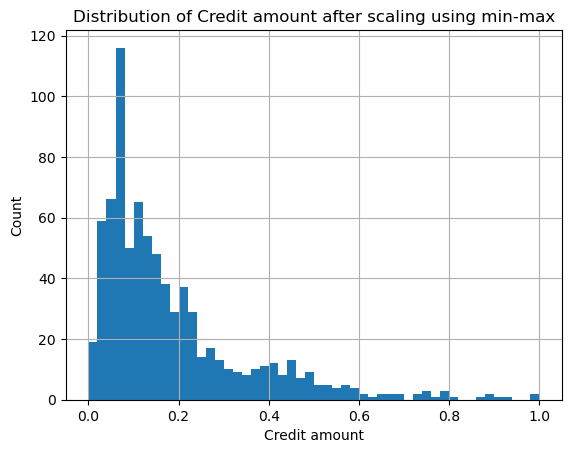

In [45]:
credit_amount_scaled.hist(bins=50)
plt.title("Distribution of Credit amount after scaling using min-max")
plt.xlabel("Credit amount")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

#### StandardScaler

In [46]:
cred_amt_std = StandardScaler()
credit_amount_std = cred_amt_std.fit_transform(credit_visualization[["Credit amount"]])
credit_amount_std

array([[ 1.92576638e+00],
       [-8.92852571e-01],
       [ 8.16433415e-01],
       [ 2.99568088e-01],
       [ 1.98265525e+00],
       [-3.15729954e-01],
       [ 1.22700638e+00],
       [-9.31402266e-01],
       [ 3.36071328e+00],
       [-8.80875967e-01],
       [-2.28899574e-01],
       [ 3.96503729e-01],
       [ 2.41556412e-01],
       [-6.66045629e-01],
       [ 1.72316668e-01],
       [-6.27121665e-01],
       [-2.18420045e-01],
       [-5.39917015e-01],
       [-3.51285498e-01],
       [-5.12595387e-01],
       [-8.01530964e-01],
       [ 1.42574316e+00],
       [ 1.64394191e+00],
       [-3.31823516e-01],
       [ 2.14609052e-01],
       [-7.15449121e-01],
       [-4.73671423e-01],
       [-3.22841063e-01],
       [ 1.19544756e-01],
       [-2.93273822e-01],
       [-9.71569271e-02],
       [-1.41320655e-01],
       [-6.51449142e-01],
       [-8.46068961e-01],
       [-3.20595450e-01],
       [-5.96057348e-01],
       [-4.04805949e-01],
       [-7.31168414e-01],
       [-2.9

In [47]:
credit_amount_std = pd.DataFrame(credit_amount_std, columns=["Credit amount"])
credit_amount_std

,Credit amount
0,1.925766
1,-0.892853
2,0.816433
3,0.299568
4,1.982655
...,...
795,-0.730794
796,-0.694864
797,-0.252479
798,1.976667


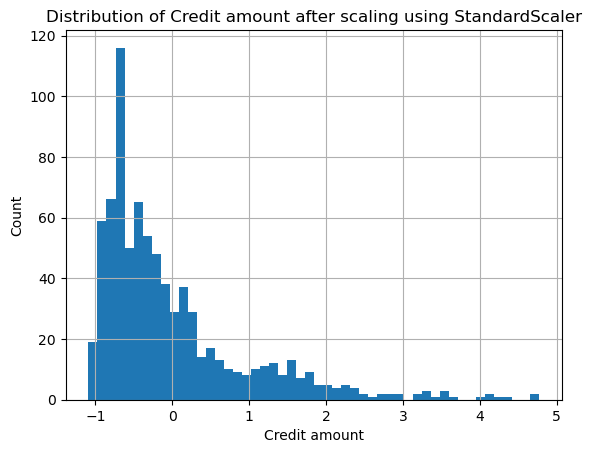

In [48]:
credit_amount_std.hist(bins=50)
plt.title("Distribution of Credit amount after scaling using StandardScaler")
plt.xlabel("Credit amount")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

The `minmaxscaler` works well for this task

In [49]:
credit_visualization.columns

Index(['Status of existing checking account', 'Duration in month',
       'Credit history', 'Purpose', 'Credit amount', 'Savings account/bonds',
       'Present employment since',
       'Installment rate in percentage of disposable income',
       'Personal status and sex', 'Other debtors / guarantors',
       'Present residence since', 'Property', 'Age in years',
       'Other installment plans', 'Housing',
       'Number of existing credits at this bank', 'Job',
       'Number of people being liable to provide maintenance for', 'Telephone',
       'Foreign worker', 'Risk'],
      dtype='object')

In [50]:
# exploring the purpose feature
credit_visualization["Purpose"].value_counts()

Purpose
A43     215
A40     194
A42     149
A41      84
A49      79
A46      40
A45      18
A44      10
A410      6
A48       5
Name: count, dtype: int64

In [53]:
# replace the purpose feature with the actual values
credit_visualization["Purpose"] = credit_visualization["Purpose"].replace({
                                                        "A40": "New car",
                                                        "A41": "Used car",
                                                        "A42": "Furniture/equipment",
                                                        "A43": "Radio/TV",
                                                        "A44": "Domestic appliances",
                                                        "A45": "Repairs",
                                                        "A46": "Education",
                                                        "A47": "Vacation",
                                                        "A48": "Retraining",
                                                        "A49": "Business",
                                                        "A410": "Others"
                                                    })

In [66]:
# explore credit history feature
credit_visualization["Credit history"].value_counts()

# replace the credit history feature with the actual values
credit_visualization["Credit history"] = credit_visualization["Credit history"].replace({
                                                        "A30": "no credits taken",
                                                        "A31": "all credits paid back duly",
                                                        "A32": "existing credits paid back duly till now",
                                                        "A33": "delay in paying off in the past",
                                                        "A34": "critical account/other credits existing (not at this bank)",
                                                    })
credit_visualization["Credit history"].value_counts()

Credit history
existing credits paid back duly till now                      416
critical account/other credits existing (not at this bank)    240
delay in paying off in the past                                72
all credits paid back duly                                     41
no credits taken                                               31
Name: count, dtype: int64

In [54]:
credit_visualization["Purpose"].value_counts()

Purpose
Radio/TV               215
New car                194
Furniture/equipment    149
Used car                84
Business                79
Education               40
Repairs                 18
Domestic appliances     10
Others                   6
Retraining               5
Name: count, dtype: int64

Majority of the indivuals were borrowing loans for the purpose of:
- buying radio or TV
- a new car and
- furniture

while the least purpose was retraining and domestic appliances

In [57]:
# explore the savings account/bonds feature
credit_visualization["Savings account/bonds"].value_counts()
# replace the savings account/bonds feature with the actual values
credit_visualization["Savings account/bonds"] = credit_visualization["Savings account/bonds"].replace({
                                                        "A61": "Less than 100 DM",
                                                        "A62": "100 - 500 DM",
                                                        "A63": "500 - 1000 DM",
                                                        "A64": "More than 1000 DM",
                                                        "A65": "Unknown/No savings account"
                                                    })
credit_visualization["Savings account/bonds"].value_counts()

Savings account/bonds
Less than 100 DM              475
Unknown/No savings account    144
100 - 500 DM                   90
500 - 1000 DM                  50
More than 1000 DM              41
Name: count, dtype: int64

In [68]:
# employement status feature
credit_visualization["Present employment since"].value_counts()
# replace the present employment since feature with the actual values
credit_visualization["Present employment since"] = credit_visualization["Present employment since"].replace({
                                                        "A71": "Unemployed",
                                                        "A72": "< 1 year",
                                                        "A73": "1 - 4 years",
                                                        "A74": "4 - 7 years",
                                                        "A75": "> 7 years"
                                                    })
credit_visualization["Present employment since"].value_counts()

Present employment since
1 - 4 years    271
> 7 years      206
< 1 year       143
4 - 7 years    139
Unemployed      41
Name: count, dtype: int64

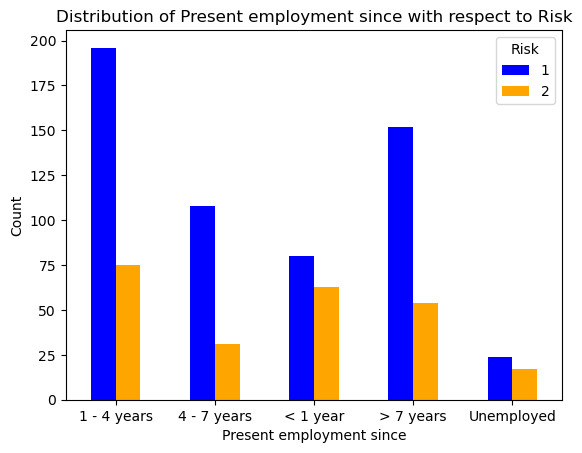

In [69]:
# compare the employment status with respect to risk
pd.crosstab(credit_visualization["Present employment since"], credit_visualization["Risk"]).plot(kind="bar", color=["blue", "orange"])
plt.title("Distribution of Present employment since with respect to Risk")
plt.xlabel("Present employment since")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

From the distribution of the employment status and risk:
- individuals with employment between 1 and 4 years appear more in this specific dataset, and good risk is higher then bad risk, the trend is the same for the people employed for less than 7 years
- for the unemployed individuals the good risk is a bit higher compared to the bad risk, this may be influenced by the number of observation of this classes

#### Personal status and sex

In [ ]:
# exploring the personal status
credit_visualization["Personal status and sex"].value_counts()

Personal status and sex
A93    430
A92    249
A94     80
A91     41
Name: count, dtype: int64

In [73]:
credit_visualization["Personal status and sex"] = credit_visualization["Personal status and sex"].replace({
    "A91": "male: divorced/separated",
    "A92": "female: divorced/separated/married",
    "A93": "male: single",
    "A94": "male: married/widowed",
    "A95": "female: single"
})
credit_visualization["Personal status and sex"].value_counts()

Personal status and sex
male: single                          430
female: divorced/separated/married    249
male: married/widowed                  80
male: divorced/separated               41
Name: count, dtype: int64

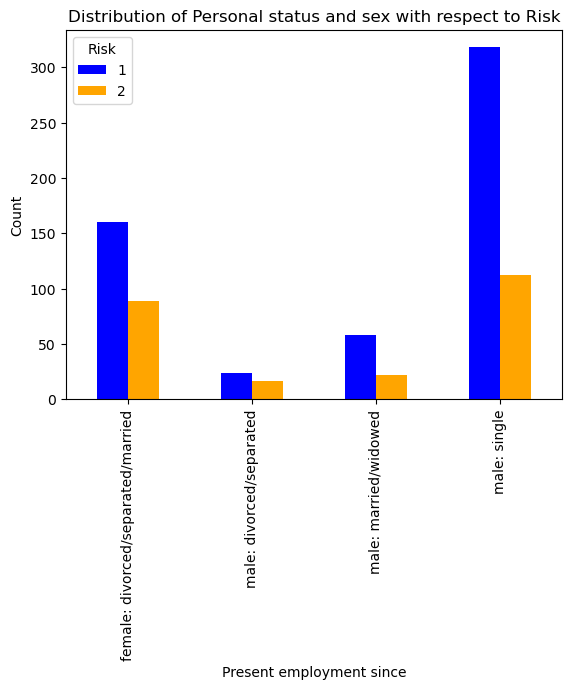

In [75]:
pd.crosstab(credit_visualization["Personal status and sex"], credit_visualization["Risk"]).plot(kind="bar", color=["blue", "orange"])
plt.title("Distribution of Personal status and sex with respect to Risk")
plt.xlabel("Present employment since")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

In [81]:
credit_visualization["gender"] = credit_visualization["Personal status and sex"]
credit_visualization.columns

Index(['Status of existing checking account', 'Duration in month',
       'Credit history', 'Purpose', 'Credit amount', 'Savings account/bonds',
       'Present employment since',
       'Installment rate in percentage of disposable income',
       'Personal status and sex', 'Other debtors / guarantors',
       'Present residence since', 'Property', 'Age in years',
       'Other installment plans', 'Housing',
       'Number of existing credits at this bank', 'Job',
       'Number of people being liable to provide maintenance for', 'Telephone',
       'Foreign worker', 'Risk', 'gender'],
      dtype='object')

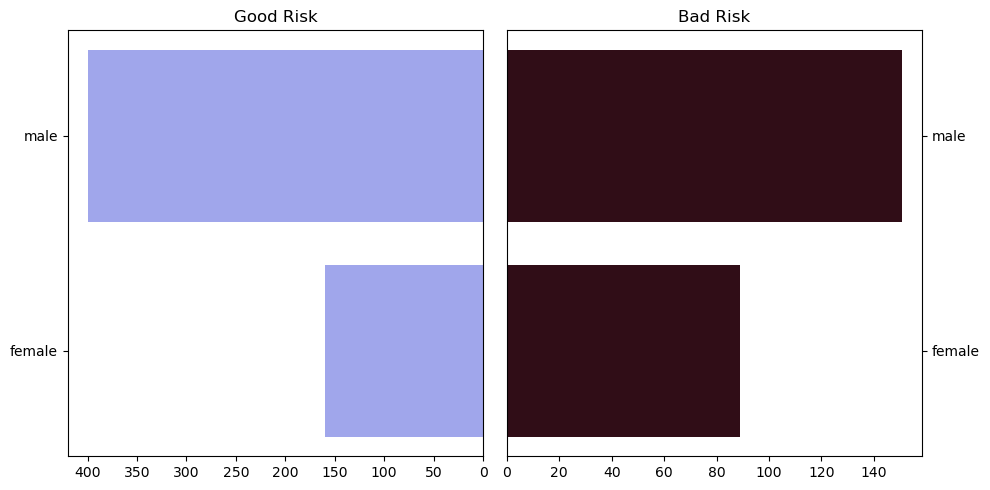

In [86]:
credit_visualization["gender"] = credit_visualization["gender"].replace({
    "male: divorced/separated": "male",
    "female: divorced/separated/married": "female",
    "male: single": "male",
    "male: married/widowed": "male",
    "female: single": "female"
})

good_risk_df = credit_visualization[credit_visualization["Risk"] == 1]
bad_risk_df = credit_visualization[credit_visualization["Risk"] == 2]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
attr_good_risk_df = good_risk_df[["gender", "Risk"]].groupby("gender").count()
attr_bad_risk_df = bad_risk_df[["gender", "Risk"]].groupby("gender").count()

ax1.barh(attr_good_risk_df["Risk"].index.tolist(), attr_good_risk_df["Risk"].tolist(), align='center', color="#a0a6eb")
ax2.barh(attr_bad_risk_df["Risk"].index.tolist(), attr_bad_risk_df["Risk"].tolist(), align='center', color="#300d17")

ax1.set_title("Good Risk")
ax2.set_title("Bad Risk")
ax1.invert_xaxis()
ax2.yaxis.tick_right()

# ax1.text(0.5, 0.5, "Good Risk", ha='center', va='center', transform=ax1.transAxes)
# ax2.text(0.5, 0.5, "Bad Risk", ha='center', va='center', transform=ax2.transAxes)
plt.tight_layout()
plt.show()

In [78]:
# renaming the rest on the instances in each feature
credit_visualization["Other debtors / guarantors"] = credit_visualization["Other debtors / guarantors"].replace({
    "A101": "none",
    "A102": "co-applicant",
    "A103": "guarantor"
})
credit_visualization["Property"] = credit_visualization["Property"].replace({
    "A121": "real estate",
    "A122": "building society savings agreement/life insurance",
    "A123": "car or other",
    "A124": "unknown / no property"
})
credit_visualization["Other installment plans"] = credit_visualization["Other installment plans"].replace({
    "A141": "bank",
    "A142": "stores",
    "A143": "none"
})
credit_visualization["Housing"] = credit_visualization["Housing"].replace({
    "A151": "rent",
    "A152": "own",
    "A153": "for free"
})
credit_visualization["Job"] = credit_visualization["Job"].replace({
    "A171": "unemployed/ unskilled - non-resident",
    "A172": "unskilled - resident",
    "A173": "skilled employee / official",
    "A174": "management/ self-employed/highly qualified employee/ officer",
})
credit_visualization["Telephone"] = credit_visualization["Telephone"].replace({
    "A191": "none",
    "A192": "yes, registered under the customers name"
})
credit_visualization["Foreign worker"] = credit_visualization["Foreign worker"].replace({
    "A201": "yes",
    "A202": "no"
})

credit_visualization.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker,Risk
828,< 0 DM,36,existing credits paid back duly till now,Used car,8335,Unknown/No savings account,> 7 years,3,male: single,none,...,unknown / no property,47,none,for free,1,skilled employee / official,1,none,yes,2
997,>= 200 DM,12,existing credits paid back duly till now,Radio/TV,804,Less than 100 DM,> 7 years,4,male: single,none,...,car or other,38,none,own,1,skilled employee / official,1,none,yes,1
148,< 0 DM,36,critical account/other credits existing (not a...,Furniture/equipment,5371,Less than 100 DM,1 - 4 years,3,male: single,guarantor,...,building society savings agreement/life insurance,28,none,own,2,skilled employee / official,1,none,yes,1
735,0 - 200 DM,36,all credits paid back duly,Domestic appliances,3990,Unknown/No savings account,< 1 year,3,female: divorced/separated/married,none,...,unknown / no property,29,bank,own,1,unemployed/ unskilled - non-resident,1,none,yes,1
130,0 - 200 DM,48,existing credits paid back duly till now,New car,8487,Unknown/No savings account,4 - 7 years,1,female: divorced/separated/married,none,...,car or other,24,none,own,1,skilled employee / official,1,none,yes,1


In [96]:
# function to visualize the distribution of the remaining features with respect to the target feature
def visualize_feature(feature):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    attr_good_risk_df = good_risk_df[[feature, "Risk"]].groupby(feature).count()
    attr_bad_risk_df = bad_risk_df[[feature, "Risk"]].groupby(feature).count()
    ax1.barh(attr_good_risk_df["Risk"].index.tolist(), attr_good_risk_df["Risk"].tolist(), 
             align='center', color="#a0a6eb")
    ax2.barh(attr_bad_risk_df["Risk"].index.tolist(), attr_bad_risk_df["Risk"].tolist(), 
             align='center', color="#300d17")
    ax1.set_title("Good Risk")
    ax2.set_title("Bad Risk")
    ax1.invert_xaxis()
    ax2.yaxis.tick_right()

    plt.suptitle(feature)
    # plt.tight_layout()
    plt.show()

#### Other debtors / guarantors
These are the people who agree to borrower's debt incase they default their loan payment

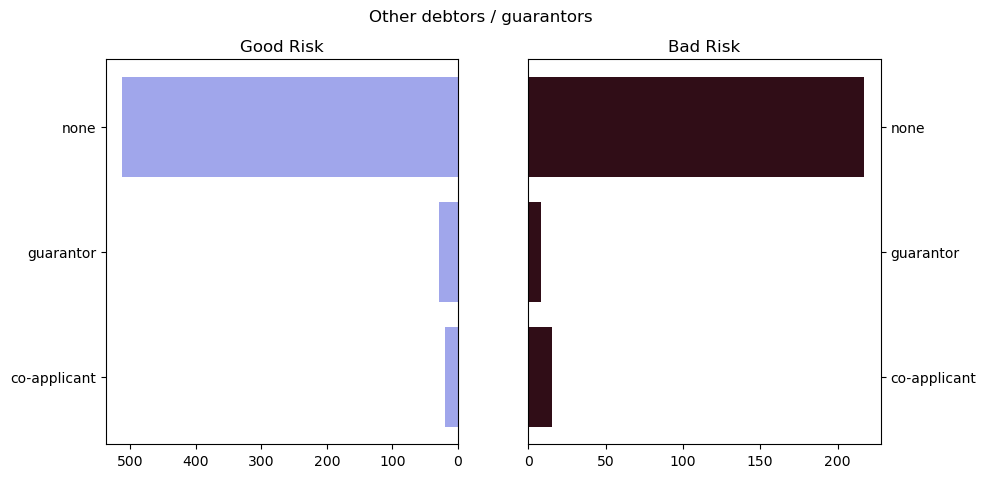

In [97]:
visualize_feature("Other debtors / guarantors")

#### Property
This is the property owned by the borrower

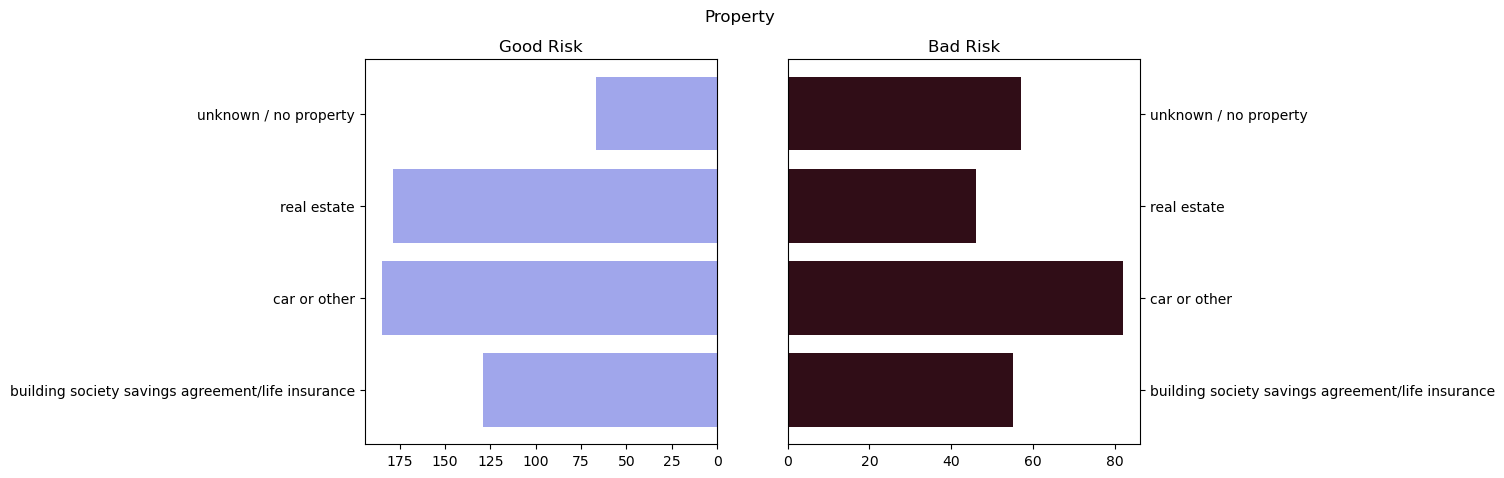

In [98]:
visualize_feature("Property")

#### Other installment plans

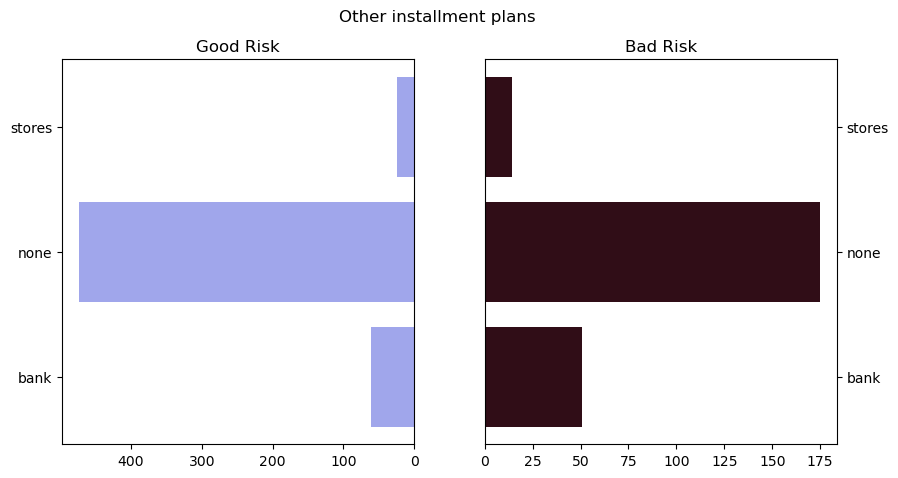

In [99]:
visualize_feature("Other installment plans")

#### Housing


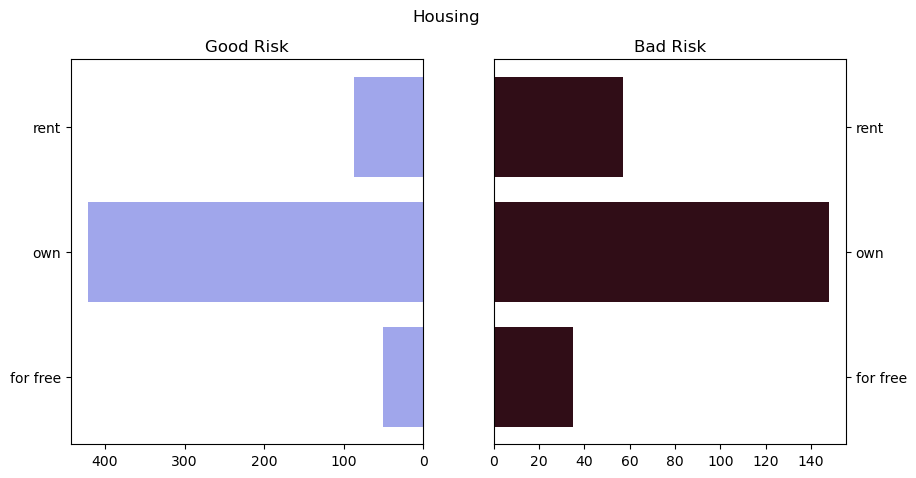

In [100]:
visualize_feature("Housing")

#### Number of existing credits at this bank

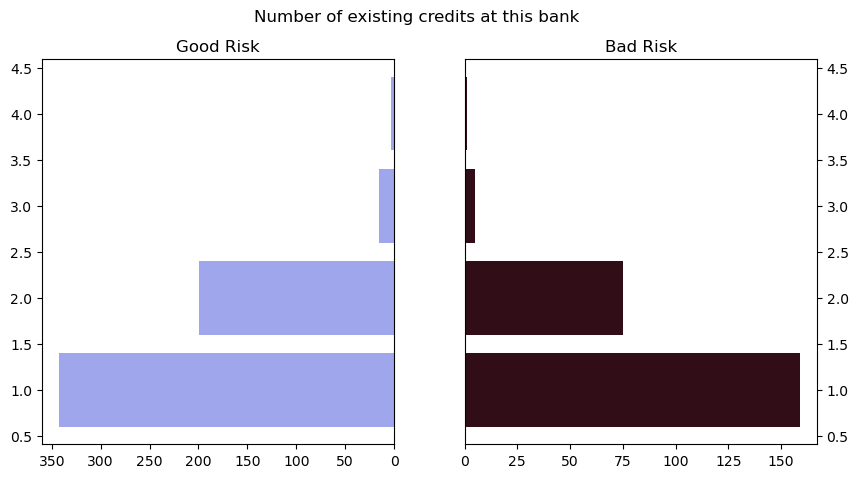

In [101]:
visualize_feature("Number of existing credits at this bank")

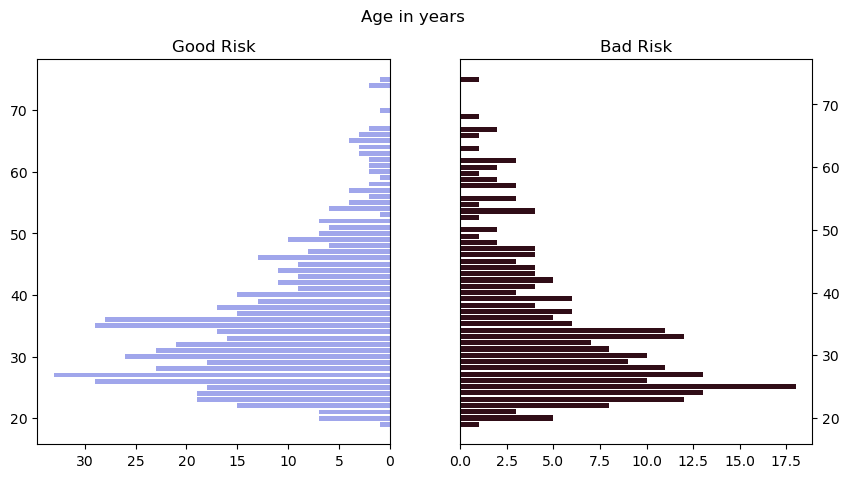

In [104]:
visualize_feature("Age in years")

KeyError: "['Age_Category'] not in index"

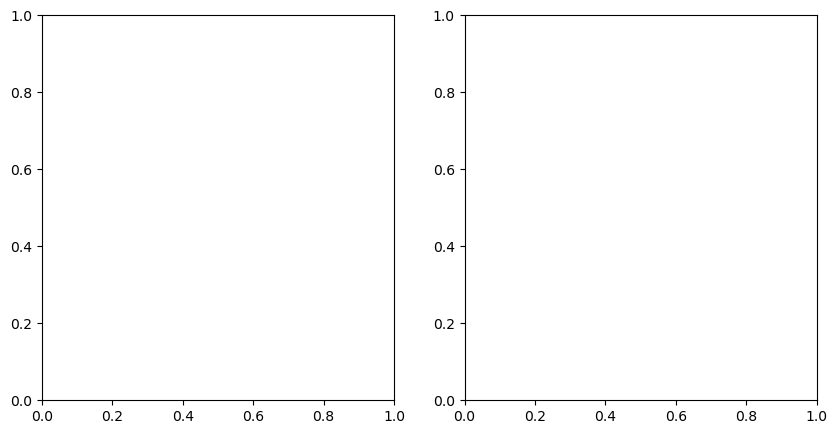

In [ ]:
# categorize the age feature
age_interval = [18, 24, 35, 55, 120]
age_category = ['Student', 'Young-Adult', 'Middle-Aged Adult', 'Senior']
credit_visualization["Age category"] = pd.cut(credit_visualization["Age in years"], age_interval, labels=age_category)

credit_visualization.columns
visualize_feature("Age category")

#### Foreign Worker

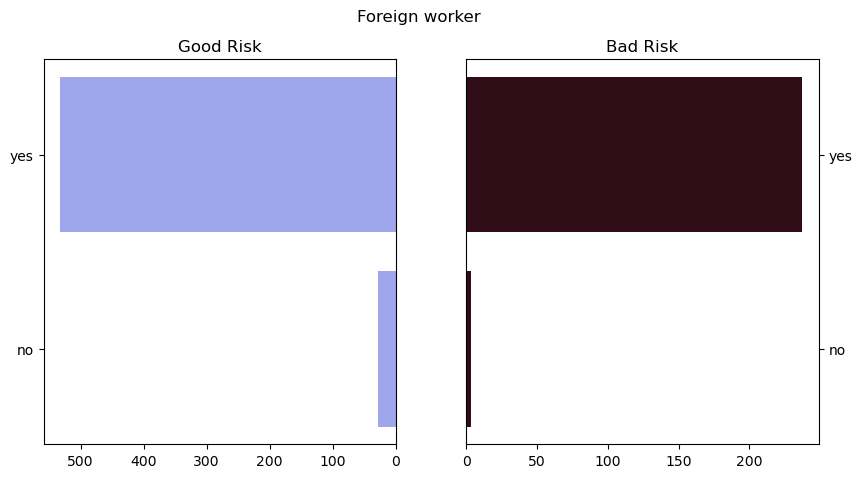

In [102]:
visualize_feature("Foreign worker")

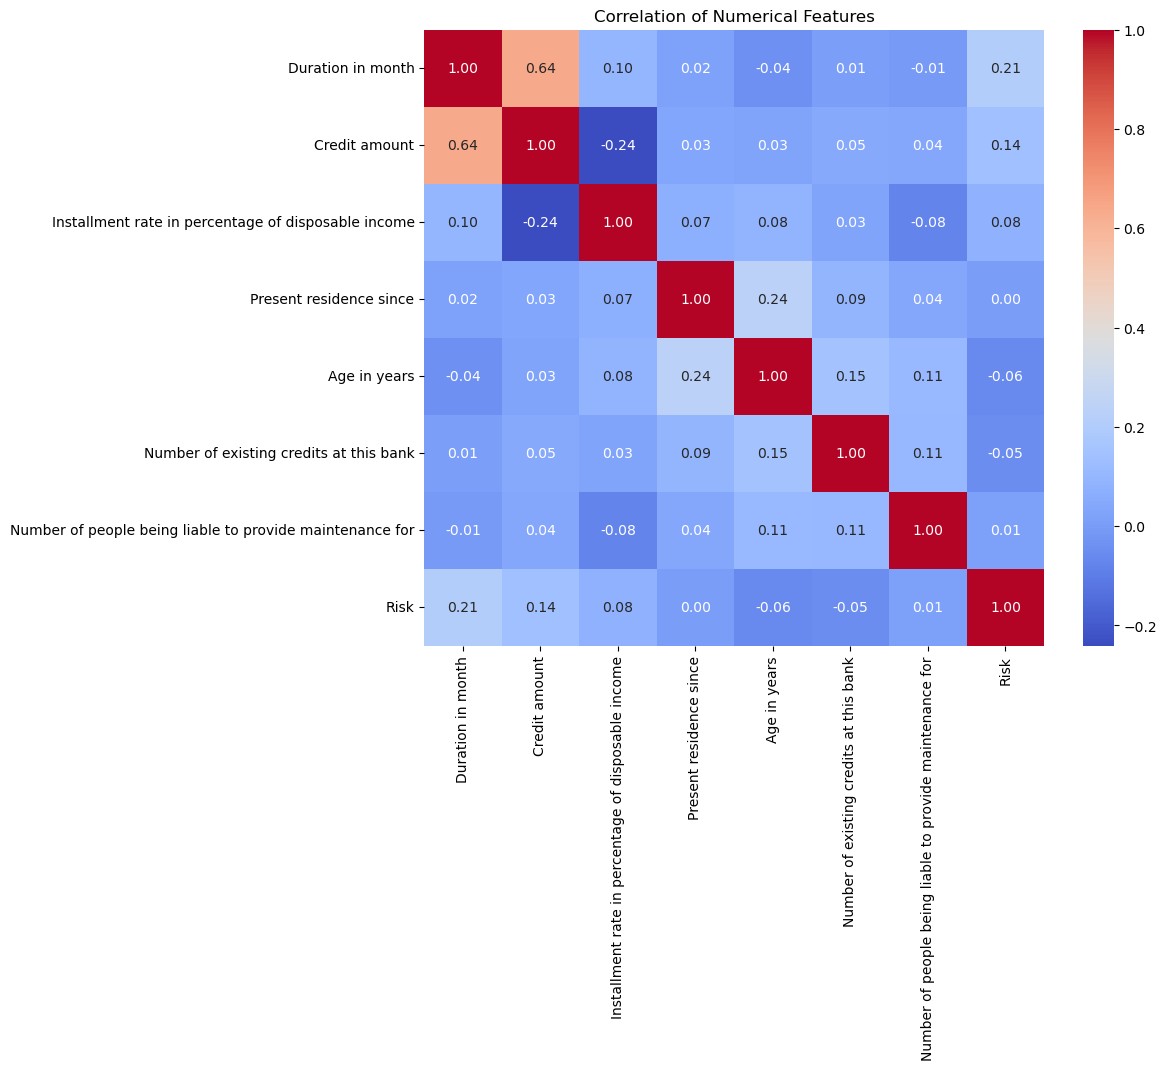

In [77]:
# correlation of numerical features
numeric_features = credit_visualization.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_features.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation of Numerical Features")
plt.show()
